# Этап 1 | Обучающая выборка | Ранжирование

## 1. Построение обучающей выборки
Пусть имеют место параметризации функций окружающей среды:
$$
\begin{cases}
    E = \sigma_1 (x + D)\\
    S_x = \sigma_2 (x + D)
\end{cases}
-D < x < 0
$$
$$
\begin{cases}
    G = (x + D_0)^2\\
    S_{\tau} = cos(2\pi\tau) + 1
\end{cases}
0 < \tau < 1
$$
Возьмем в качестве $v_i$ стратегии две стадии жизнии зоопланктона: молодых и взрослых особей
$$
x_{yng} = A_{yng} + B_{yng}cos(2\pi\tau)\ \ \ \ \ \ x_{old} = A_{old} + B_{old}cos(2\pi\tau)
$$
Ключевыми макропараметрами являются:

$M_1$ и $М_5$ - количество потребляемой пищи в сутки

$M_2$ и $М_6$ - суточная смертность от хищников

$M_3$ и $М_7$ - метаболическая стоимость вертикальной миграции

$M_4$ и $М_8$ - смертность зоопланктона от неблагоприятных условий среды

        Для молодых особей:
$$
M_1(v_i) = \int_0^1 E(x_{yngi}(\tau))d\tau\ \ \ \ \ \ M_2(v_i) = \int_0^1 S_{\tau}(\tau)S_x(x_{yngi}(\tau))d\tau\ \ \ \ \ \ M_3(v_i) = -\int_0^1 (x'_{yngi}(\tau))d\tau\ \ \ \ \ \ M_4(v_i) = -\int_0^1 G(x_{yngi}(\tau))d\tau
$$
        Для взрослых особей:
$$
M_5(v_i) = \int_0^1 E(x_{oldi}(\tau))d\tau\ \ \ \ \ \ M_6(v_i) = \int_0^1 S_{\tau}(\tau)S_x(x_{oldi}(\tau))d\tau\ \ \ \ \ \ M_7(v_i) = -\int_0^1 (x'_{oldi}(\tau))d\tau\ \ \ \ \ \ M_8(v_i) = -\int_0^1 G(x_{oldi}(\tau))d\tau
$$

Известная функция фитнеса: $J = -s-p-q+\sqrt[2]{4rp+(p+q-s)^2}$
С коэффициентами:

$r_i = \alpha_{old} M_5 + \beta_{old} M_7 + \delta_{old} M_8$


$s_i = \gamma_{old}M_6$


$p_i = \alpha_{yng}M_1 + \beta_{yng} M_3 + \delta_{yng} M_4$


$q_i = \gamma_{yng}M_2$

In [183]:
# Используемые библиотеки
import random as rn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [184]:
# Эмпирические данные 
alpha_y = 0.0016
alpha_o = 0.006
betta_y = 0.0000007
betta_o = 0.000000075
gamma_y = 0.00008
gamma_o = 0.004
delta_y = 0.000016
delta_o = 0.00006

D = 120
D0 = 70  
sigma1 = 1
sigma2 = 1
Nmax = 1000

In [185]:
# Генерация параметров для стратегий
# Запись параметров обучающей выборки 
def rand_AB(Nmax):
   A_yng, B_yng, A_old, B_old = [], [], [], []
   for i in range(0, Nmax):
      Ay = round(rn.uniform(-D, 0), 4)
      By = round(rn.uniform(-min(Ay + D, -Ay), min(Ay + D, -Ay)), 4)
      A_yng.append(Ay)
      B_yng.append(By)

      Ao = round(rn.uniform(-D, 0), 4)
      Bo = round(rn.uniform(-min(Ao + D, -Ao), min(Ao + D, -Ao)), 4)
      A_old.append(Ao)
      B_old.append(Bo)
   
   data_AB = {'A_yng': A_yng, 'B_yng': B_yng, 'A_old': A_old, 'B_old': B_old}
   dataAB = pd.DataFrame(data = data_AB)
   dataAB.to_csv("data_AB.csv")


In [186]:
# Создание стратегий
def strategy(t, Nmax):
   data_AB = pd.read_csv('data_AB.csv')
   Ay = data_AB['A_yng'].tolist()
   By = data_AB['B_yng'].tolist()
   Ao = data_AB['A_old'].tolist()
   Bo = data_AB['B_old'].tolist()
   x_yng, x_old = [], []
   for i in range(0, Nmax):
      xyng = Ay[i] + By[i]*np.cos(2*np.pi*t)
      x_yng.append(xyng)

      xold = Ao[i] + Bo[i]*np.cos(2*np.pi*t)
      x_old.append(xold)
   data_x = {'x_yng': x_yng,'x_old': x_old}
   dataX = pd.DataFrame(data = data_x)
   dataX.to_csv("data_X.csv")
   return x_yng, x_old

In [187]:
# Подсчет макропараметров
def Macroparametrs():
   data_AB = pd.read_csv('data_AB.csv')
   Ay = data_AB['A_yng'].tolist()
   By = data_AB['B_yng'].tolist()
   Ao = data_AB['A_old'].tolist()
   Bo = data_AB['B_old'].tolist()
   M1, M2, M3, M4, M5, M6, M7, M8 = [], [], [], [], [], [], [], []
   for i in range(0, Nmax):
      M1.append(round(sigma1*(Ay[i] + D), 5))
      M2.append(round(-sigma2*(Ay[i] + D + By[i]/2), 5))
      M3.append(round(-2*(np.pi*By[i])**2, 5))
      M4.append(round(-((Ay[i] + D0)**2 + (By[i]**2)/2), 5))
      M5.append(round(sigma1*(Ao[i] + D), 5))
      M6.append(round(-sigma2*(Ao[i] + D + Bo[i]/2), 5))
      M7.append(round(-2*(np.pi*Bo[i])**2, 5))
      M8.append(round(-((Ao[i] + D0)**2 + (Bo[i]**2)/2), 5))

   data_M = {'M1': M1, 'M2': M2, 'M3': M3, 'M4': M4, 'M5': M5, 'M6': M6, 'M7': M7, 'M8': M8}
   dataM = pd.DataFrame(data = data_M)
   dataM.to_csv("data_M.csv")
   """ Macroparametrs_normalize() """

In [188]:
# Тут нормализуются макропараметры
def Macroparametrs_normalize():
   data_M = pd.read_csv('data_M.csv')
   M1 = data_M['M1'].tolist()
   M2 = data_M['M2'].tolist()
   M3 = data_M['M3'].tolist()
   M4 = data_M['M4'].tolist()
   M5 = data_M['M5'].tolist()
   M6 = data_M['M6'].tolist()
   M7 = data_M['M7'].tolist()
   M8 = data_M['M8'].tolist()
   abs_M1, abs_M2, abs_M3, abs_M4, abs_M5, abs_M6, abs_M7, abs_M8 = [], [], [], [], [], [], [], []
   M1_n, M2_n, M3_n, M4_n, M5_n, M6_n, M7_n, M8_n = [], [], [], [], [], [], [], []
   for i in range(0, Nmax):
      abs_M1.append(abs(M1[i]))
      abs_M2.append(abs(M2[i]))
      abs_M3.append(abs(M3[i]))
      abs_M4.append(abs(M4[i]))
      abs_M5.append(abs(M5[i]))
      abs_M6.append(abs(M6[i]))
      abs_M7.append(abs(M7[i]))
      abs_M8.append(abs(M8[i]))
   
   for i in range(0, Nmax):
      M1_n.append(M1[i]/max(abs_M1))
      M2_n.append(M2[i]/max(abs_M2))
      M3_n.append(M3[i]/max(abs_M3)) 
      M4_n.append(M4[i]/max(abs_M4))
      M5_n.append(M5[i]/max(abs_M5))
      M6_n.append(M6[i]/max(abs_M6))
      M7_n.append(M7[i]/max(abs_M7)) 
      M8_n.append(M8[i]/max(abs_M8))

   data_M_n = {'M1': M1_n, 'M2': M2_n, 'M3': M3_n, 'M4': M4_n, 'M5': M5_n, 'M6': M6_n, 'M7': M7_n, 'M8': M8_n}
   dataMnorm = pd.DataFrame(data = data_M_n)
   dataMnorm.to_csv("data_Mnorm.csv") 

In [189]:
# Счатем фитнесс
def fitness():
   data_M = pd.read_csv('data_M.csv')
   M1 = data_M['M1'].tolist()
   M2 = data_M['M2'].tolist()
   M3 = data_M['M3'].tolist()
   M4 = data_M['M4'].tolist()
   M5 = data_M['M5'].tolist()
   M6 = data_M['M6'].tolist()
   M7 = data_M['M7'].tolist()
   M8 = data_M['M8'].tolist()
   J = []
   r, s, p, q = 0, 0, 0, 0
   for i in range(0, Nmax):
      r = alpha_o*M5[i] + betta_o*M7[i] + delta_o*M8[i]
      s = gamma_o*M6[i]
      p = alpha_y*M1[i] + betta_y*M3[i] + delta_y*M4[i]
      q = gamma_y*M2[i]
      j_ =  -s - p - q + np.sqrt(4*r*p + (p + q - s)**2)
      J.append(j_)
   return J

Миграции молодых особей


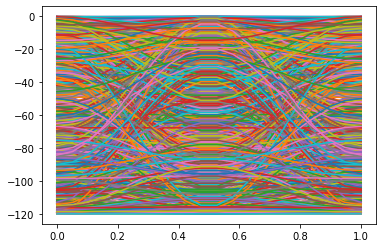

Миграции взрослых особей


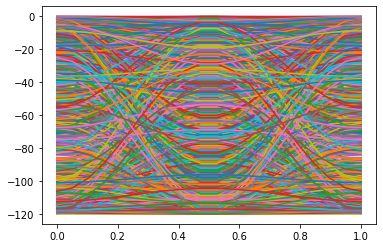

In [181]:
# Тут строятся все синусоиды СВМ зоопланктона
t = np.linspace(0, 1, 20)
rand_AB(Nmax)
x = strategy(t, Nmax)
x_yng = x[0]
x_old = x[1]
DVM_yng = []
DVM_old = []
print('Миграции молодых особей')
for i in range (0, Nmax):
   DVM_yng.append(x_yng[i])
   plt.plot(t, DVM_yng[i])
plt.show()
print('Миграции взрослых особей')
for i in range (0, Nmax):
   DVM_old.append(x_old[i])
   plt.plot(t, DVM_old[i])
plt.show()


In [182]:
Macroparametrs()
J = fitness()
print(J)


[1.041496453879336, 0.8124576731822172, 0.8177980231613865, 0.7691763989207205, 0.2348585609579541, 0.07051094818055259, 0.2675341487839916, 0.851638584475946, 0.48921064768103684, 0.8540385806143195, 0.16315243283594574, 0.48744412848211266, 1.0049472074822547, 0.17274238005490844, 0.9697720361093758, 0.7986263408171734, 0.6413356167980488, 0.23151857630017228, 0.595007239247494, 0.7551720486613429, 0.8735606055820861, nan, 0.631055773564899, 0.1729728774909014, 0.5275954425693756, 0.4485489180874627, 0.7377813538478684, 0.994761531188135, 0.8248342558906118, 0.8735999193272932, 1.0358092190240664, 0.30878924324844165, nan, 1.037443392406363, 0.5657363484475708, 0.7420154095920944, 0.737151827683973, 0.9932617438049633, 0.9397964971264179, nan, 0.9525161225960059, 0.8827232320720065, nan, 0.3237693695966356, 0.721710376743764, 0.6683549632330548, 0.3698324311045342, 0.9593283072853691, 0.9510582925282816, 0.9462843696020902, 0.7869121121993795, 0.6824392296051304, 0.9137722649917811, 

C:\Users\MANDAR~1\AppData\Local\Temp/ipykernel_12228/3001731184.py:19: RuntimeWarning: invalid value encountered in sqrt
  j_ =  -s - p - q + np.sqrt(4*r*p + (p + q - s)**2)
